In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = "True")

Mounted at /content/gdrive


In [3]:
#important before run :)
import sys
myFolder ="Software_Engineering"
import os
sys.path.append('/content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/')
os.environ['PATH'] += ":/content/drive/MyDrive/" + myFolder + "/CodeRelated/Translation/scripts_local"

for a in sys.path:
  print(a)



/content
/env/python
/usr/lib/python37.zip
/usr/lib/python3.7
/usr/lib/python3.7/lib-dynload
/usr/local/lib/python3.7/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.7/dist-packages/IPython/extensions
/root/.ipython
/content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/


In [4]:
#All installations before running the program

!pip install googletrans==3.1.0a0
!pip install OpenNMT-py




     |████████████████████████████████| 55 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 5.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=67afaa805d88e1a3b699b3a05dd2ab5b9b9d2dff048a1dc82fdd84c94f2d27c2
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
     |████████████████████████████████| 216 kB 2.8 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 16.0 MB 115 kB/s 
     |████████████████████████████████| 1.2 MB 43.6 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.10.0
    Uninstalling torchtext-0.10.0:
      Successfu

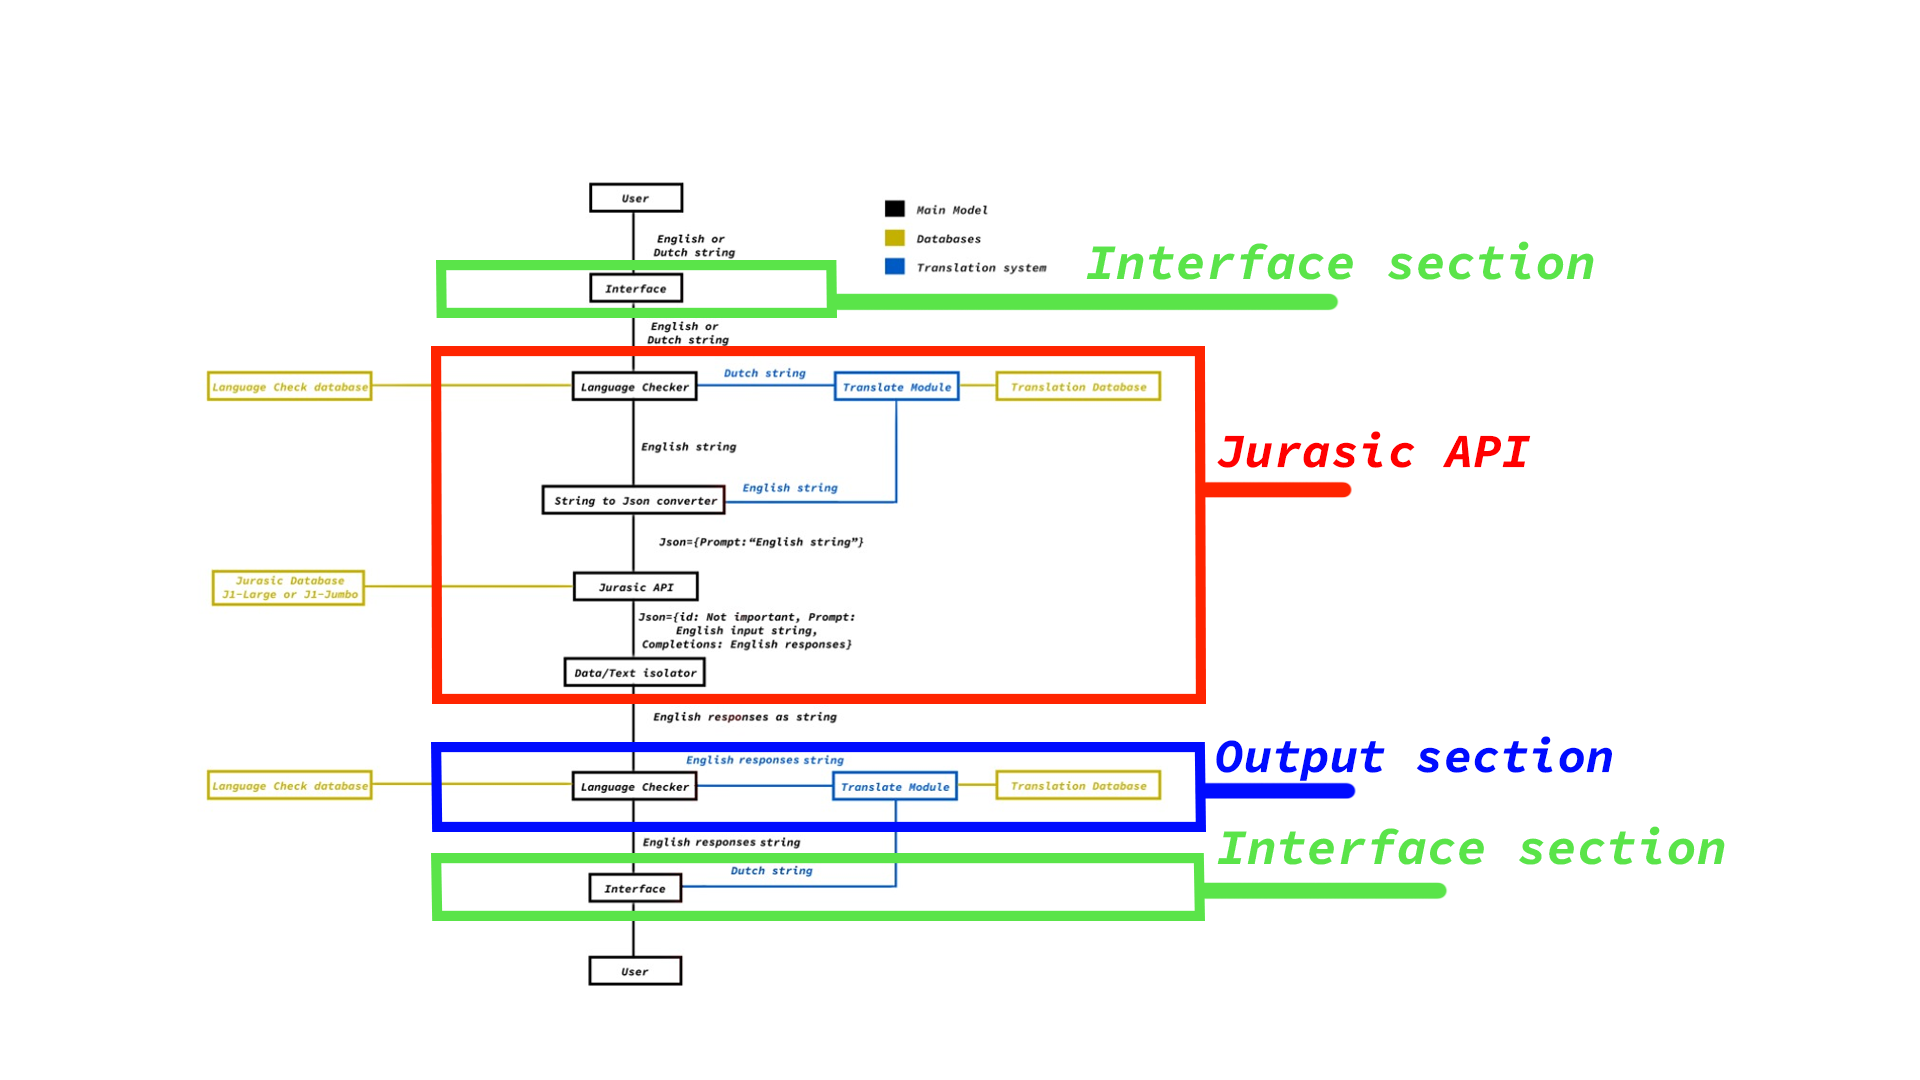

In [5]:
#Shows FlowDiagram
from IPython.display import Image
Image('/content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/FlowDiagram.png')

In [6]:
#In order to fully grasp what is going on please read the annotation.
#Please also open the Flow diagram (). It will make more sense that way :)
from jurrasicapicall import JurrasicCall  #imports our api call function

##############################################################################################################################################################################
# We start at the Interface
##############################################################################################################################################################################

input = "Vandaag de dag zijn er steeds meer"                                        #default here, but should be send here from the interface
with open('/content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/input.txt','r+') as myfile:      #Opens input file
  data = myfile.read()                                                                                              #stores input file as my data
  myfile.seek(0)                                                                                                    #Looks for first position to start writing
  myfile.write(input)                                                                                           #Writes the string which has to be translated into the file
  myfile.truncate()                                                                                                 #Empties the rest of the file (except for the stuff which was just added) 

##############################################################################################################################################################################
# From here we are moving into the JurrasicAPI
##############################################################################################################################################################################

from googletrans import Translator                                #Translator from google, which checks what language it is (should be approved first)
detector = Translator()                                           

languagein = detector.detect(input)                               #Sets languagein as the langauge which is used in 'input' 
print("The detected language is: ", languagein.lang)
print("the input given is: ", input)

if languagein.lang == "en":                                         #if the language is english
  outputJur = JurrasicCall(input)                                 #...it will call the Jurrasic API and generate an answer
else:
  #TranslateDutch-English                                                                                                               #Needs to be implemented                                                  
 
  !onmt_translate --model /content/gdrive/MyDrive/Software_Engineering/CodeRelated/Translation/EN-NL/model/Flipped/Flipped_model_retry_step_100000.pt --src /content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/input.txt --output /content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/output.txt --gpu 0 -verbose
  g = open("/content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/Du-EnOutput.txt", "r")                                                                                 #Opens the output (from our translation) as read
  TranslatedInput = g.read()                                                                                                           #Sets TranslatedInput to the output which was generated by our model
  outputJur = JurrasicCall(TranslatedInput) 



##############################################################################################################################################################################
# From here we are moving into the output section of the flow diagram
##############################################################################################################################################################################

if languagein.lang == "en":     
  outputJur = outputJur
else:                                                                                                               #When input was dutch, the output has to be translated back to dutch.
  with open('/content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/input.txt','r+') as myfile:      #Opens input file
    data = myfile.read()                                                                                              #stores input file as my data
    myfile.seek(0)                                                                                                    #Looks for first position to start writing
    myfile.write(outputJur)                                                                                           #Writes the string which has to be translated into the file
    myfile.truncate()                                                                                                 #Empties the rest of the file (except for the stuff which was just added) 
  !onmt_translate --model /content/gdrive/MyDrive/Software_Engineering/CodeRelated/Translation/EN-NL/model/model_retry_step_100000.pt --src /content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/input.txt --output /content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/output.txt --gpu 0 -verbose
  f = open("/content/gdrive/MyDrive/Software_Engineering/CodeRelated/Orchestrator/output.txt", "r")                 #Opens the output as read
  TranslatedOutputJur = f.read()                                                                                    #Sets TranslatedOutput to the output which was generated by our model
  outputJur = TranslatedOutputJur                                                                                       
  #send to interface                                                                                     


##############################################################################################################################################################################
# From here we are moving into the interface again
##############################################################################################################################################################################

#Response = outputJur or TranslatedOutputJur 
print("Response from our chatbot is: " , outputJur)














The detected language is:  nl
the input given is:  Vandaag de dag zijn er steeds meer
[2021-10-27 12:58:13,679 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2021-10-27 12:58:14,034 INFO] 
SENT 1: ['Vandaag', 'de', 'dag', 'zijn', 'er', 'steeds', 'meer']
PRED 1: Today the final day is still growing
PRED SCORE: -10.1630

[2021-10-27 12:58:14,035 INFO] PRED AVG SCORE: -1.4519, PRED PPL: 4.2710
[2021-10-27 12:58:49,383 INFO] Translating shard 0.
/usr/local/lib/python3.7/dis